# Data Plan Recommendation

At your disposal is data on the behavior of customers who have already switched to these data plans- "smart" and "ultra". We need to build a model for the classification task that will select the appropriate tariff. 

Build a model with the highest possible *accuracy* value. To pass the project successfully, you need to bring the percentage of correct answers to at least 0.75. Check *accuracy* on a test sample yourself.

**Work plan:**
- study the source data
- divide the data into training, validation and test samples.
- apply decision tree, random forest and logistic regression models and find the model with the highest quality.
- check the quality of the model on a test sample.

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Reading the data:

In [3]:
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.6 KB


We have data on the behavior of cellular network users based on signs, we need to learn how to determine whether the user will switch to the ulra tariff.

## Splitting the data into samples

Let's see how many clients are on plan "ultra".

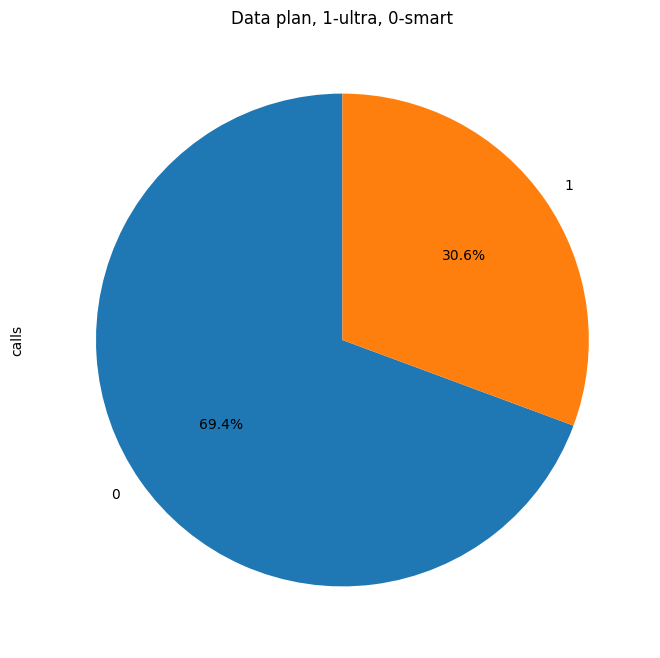

In [5]:
df.pivot_table(index='is_ultra', aggfunc='count')['calls'].plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), subplots=True)
plt.title('Data plan, 1-ultra, 0-smart')
plt.show() 


30.6% pf clients connected to a plan "ultra".


Нужно решить задачу классификации. Целевой критерий - тариф. Выделим признаки и целевую переменную.
This is a classification problem. Target feature- plan option. Determining features and target.

In [6]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

print(features.shape),print(target.shape)


(3214, 4)
(3214,)


(None, None)

Divide the data into training, validation and test samples in proportion 60%-20%-20%:

In [9]:
#Split into test and temporary samples (80% of data)
features_train_temp, features_test, target_train_temp, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

#Dividing the temporary sample into training and validation samples,  0.25*0.8=0.2
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_temp, target_train_temp, test_size=0.25, random_state=12345)

print('Size of train sample:', len(target_train), ", Portion:", round(len(target_train)/len(target), 2))
print('Size of validation sample:', len(target_valid), ", Portion:", round(len(target_valid)/len(target), 2))
print('Size of test sample::', len(target_test), ", Portion:", round(len(target_valid)/len(target), 2))

Size of train sample: 1928 , Portion: 0.6
Size of validation sample: 643 , Portion: 0.2
Size of test sample:: 643 , Portion: 0.2


## Model researching

Assignment: Investigate the quality of different models by changing hyperparameters. Briefly write the findings of the study.

**Model 1. Decision tree.** As a hyperparameter, we will change the height of the tree from 1 to 20.

In [11]:
best_model = None
best_result = 0
best_depth = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid)
    print(result, depth)    
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print()        
print('accuracy=', best_result, 'Best models  depth depth=', best_depth)


0.7387247278382582 1
0.7573872472783826 2
0.7651632970451011 3
0.7636080870917574 4
0.7589424572317263 5
0.7573872472783826 6
0.7744945567651633 7
0.7667185069984448 8
0.7620528771384136 9
0.7713841368584758 10
0.7589424572317263 11
0.7558320373250389 12
0.749611197511664 13
0.7573872472783826 14
0.7527216174183515 15
0.749611197511664 16
0.7387247278382582 17
0.7418351477449455 18
0.7356143079315708 19
0.7293934681181959 20

accuracy= 0.7744945567651633 Best models  depth depth= 7


Наиболее точной является модель с высотой depth= 7,
accuracy= 0.7744945567651633. 

In [12]:
criteria = ['gini', 'entropy']
best_model = None
best_result = 0
best_depth = 0

for criterion in criteria:
    model = DecisionTreeClassifier(random_state=12345, max_depth=7, criterion=criterion)
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid)
    print(result, depth)    
    if result > best_result:
        best_model = model
        best_result = result
        best_criterion = criterion
print()        
print('accuracy=', best_result, 'Best criteria=', best_criterion)


0.7744945567651633 20
0.7776049766718507 20

accuracy= 0.7776049766718507 Best criteria= entropy


For the decision tree, the highest accuracy of 0.7776049766718507 is achieved with tree height 7 and entropy criterion.

**Model 2. Random forest.**

Let's look at the model by changing the number of trees and then the height of the trees.

In [13]:
best_model = None
best_result = 0
for est in range(100,200,5):
    model = RandomForestClassifier(random_state=12345, n_estimators= est) 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    print(result, est)
    if result > best_result:
        best_model = model 
        best_result = result 
        best_est = est
print()

print("Accuracy of the best model on the validation set:", best_result, "N of Trees:", best_est)

0.7947122861586314 100
0.7931570762052877 105
0.7916018662519441 110
0.7931570762052877 115
0.7947122861586314 120
0.7947122861586314 125
0.7962674961119751 130
0.7962674961119751 135
0.7993779160186625 140
0.7978227060653188 145
0.8009331259720062 150
0.8009331259720062 155
0.8009331259720062 160
0.8009331259720062 165
0.8009331259720062 170
0.7993779160186625 175
0.7993779160186625 180
0.7962674961119751 185
0.7962674961119751 190
0.7947122861586314 195

Accuracy of the best model on the validation set: 0.8009331259720062 N of Trees: 150


Here Accuracy of the best model: 0.8009331259720062, with the number of trees: 150.

In [14]:
best_model = None
best_result = 0
for depth in range(1,30):
    model = RandomForestClassifier(random_state=12345, n_estimators= 150, max_depth=depth) 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    print(result, depth)
    if result > best_result:
        best_model = model 
        best_result = result 
        best_depth = depth
print()

print("Accuracy of the best model on the validation set:", best_result, "Tree depth:", best_depth)

0.7620528771384136 1
0.7620528771384136 2
0.7698289269051322 3
0.7729393468118196 4
0.7807153965785381 5
0.7791601866251944 6
0.7853810264385692 7
0.7838258164852255 8
0.7884914463452566 9
0.7916018662519441 10
0.7916018662519441 11
0.7978227060653188 12
0.7978227060653188 13
0.7916018662519441 14
0.7962674961119751 15
0.7993779160186625 16
0.7900466562986003 17
0.7962674961119751 18
0.7916018662519441 19
0.7978227060653188 20
0.7947122861586314 21
0.80248833592535 22
0.8009331259720062 23
0.7978227060653188 24
0.7978227060653188 25
0.7993779160186625 26
0.80248833592535 27
0.8009331259720062 28
0.80248833592535 29

Accuracy of the best model on the validation set: 0.80248833592535 Tree depth: 22


For the random forest, we achieved a maximum accuracy of 0.80248833592535 with a tree height of 22 and a number of trees of 150. The calculation takes a little longer than modeling with a single decision tree.

**Model 3. Logistic regression.**

Hyperparameter : solver

In [11]:
solvers= ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver_type in solvers:
    model = LogisticRegression(random_state=12345, solver=solver_type, max_iter=5000)
    model.fit(features_train, target_train)
    model.predict(features_valid)
    print("Accuracy:", model.score(features_valid, target_valid))

Accuracy: 0.6905132192846034
Accuracy: 0.6920684292379471


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy: 0.7278382581648523
Accuracy: 0.6889580093312597
Accuracy: 0.6936236391912908


*Accuracy* takes the maximum value with the standard value of lbfgs and newton-cg. Let's leave it as standard.

In [12]:
iterations=[100,500,1000,2000,5000]
for iteration in iterations:
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iteration)
    model.fit(features_train, target_train)
    model.predict(features_valid)
    print("Accuracy:", model.score(features_valid, target_valid))

Accuracy: 0.6905132192846034
Accuracy: 0.6905132192846034
Accuracy: 0.6905132192846034
Accuracy: 0.6905132192846034
Accuracy: 0.6905132192846034


The number of iterations does not affect the quality of the model.

Model quality for logistic regression Accuracy: 0.7262830482115086, calculation is fast.

**Conclusion from step 3:** Of the three models considered, the random forest model showed the highest quality, accuracy: 0.80248833592535 with a tree height of 22 and a number of trees of 150.

## Model testing

Let's test the random forest model with the obtained hyperparameters.

In [13]:
model = RandomForestClassifier(random_state=12345, n_estimators= 150, max_depth=22) 
model.fit(features_train, target_train) 
result = model.score(features_test, target_test) 
print(result)


0.7993779160186625


The accuracy on the test set is lower than on the training set, which indicates that the model is overtrained. This may have been due to the "tall" tree.

**Conclusion:**

Preprocessed data on mobile network users was obtained, indicating the number and duration of calls, Internet traffic used, number of SMS messages and whether they switched to the ultra tariff. It was necessary to build a model for the classification task that would select the appropriate tariff. Three models were built - DecisionTreeClassifiler, RandomForestClassifier, LogosticRegression with various hyperparameters. The highest accuracy value was shown by the RandomForestClassifier model, accuracy: 0.80248833592535 with a tree height of 22 and a number of trees of 150. On the test sample, the model showed a value of 0.7978227060653188, which means that the model is slightly overtrained.